# Lecture 3: Data Visualization

We've now learned the basics of Python, N-dimensional arrays, and Pandas, along with how to manipulate and clean data with Python packages. Let's dive into a field that is one of the most important aspect of data science: data visualization.

In this lecture we will learn:

1. Why data visualization is important,
2. Notable techniques used to visualize data,
3. The challenges of data visualization, and
4. Useful visual tools available in Python.

## Why is Data Visualization Important?

Visualizing data is crucial in communicating ideas. We more readily and easily process information that is visual rather than abstract in nature. Since much of the output that arises from data analytics is abstract, visualization allows both easy digestion of complex patterns and presentation of consequent insight to those from non-technical backgrounds.

Many avoid data visualization because the process can be time-consuming, and good visuals are perceived to be hard to make. But many latent trends in a dataset can only be made noticeable via visualization. Not visualizing at all can result in a lack of foresight when it comes to model and parameter selection. When in doubt, visualize!

Note that there are typically two types of visualizations: __distributional__ (using histograms or box plots to assess the distribution of a variable) and __correlational__ (using line plots or scatter plots to understand the relationship between two variables).

The process of data visualization usually works in the following fashion:  

* Simple data analysis (correlational, summarize)
* Data visualization
* Identification of pattern
* Secondary analysis or implementation

In this lecture, we will learn about the python library called `matplotlib`, one of the most popular plotting library for Python. It has similar overall design as MatLab's graphical plotting.

Check the [official website](http://matplotlib.org/) for more details.


Let's see how this works using the built-in `iris` dataset in sklearn. This dataset is based on a famous experiment conducted by R.A. Fisher [1].

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

This dataset is a good example of a classification problem, where we can use this dataset to train an algorithm that outputs species given a sepal width and length and a petal width and  length.  
### First Step: Correlational Analysis

In [7]:
import matplotlib.pyplot as plt

X = pd.DataFrame(iris.data,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']) #Name columns according to sklearn API
Y= pd.DataFrame(iris.target)

#FIRST STEP: CORRELATIONAL ANALYSIS
corr = np.corrcoef(X,rowvar=False) #rowvar = False b/c our columns are features
print (corr)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


We can see that there is a negative correlation between the sepal features and positive correlation between petal features. However, linear correlation reveals little of the actual dynamics of the data, as will be shown below
## Second Step:Visualization

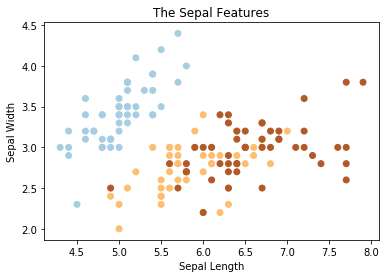

In [8]:
fig = plt.figure()
plt.scatter(X['Sepal Length'],X['Sepal Width'],c=Y, cmap=plt.cm.Paired) #Colored by species. 
plt.title('The Sepal Features')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show(fig)

We can see that the negative linear correlation is in fact not an apt representation of the data. It is better to understand it in terms of clusters. 

It is noticeable that  
__1. There is a clear clustering behavior for setosa (light blue)__  
__2. Versicolor and virginica is not clearly separated (brown/orange)__

This kind of information is valuable in assessing what kind of model to choose, and what kind of additional analysis that needs to take before we are sure of what to do with our dataset. It is possible, however, to further embellish our visual analysis by using a 3d plot and adding in another feature. 

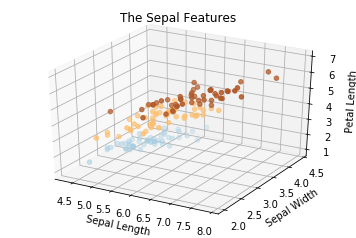

In [4]:
from mpl_toolkits.mplot3d import Axes3D


fig2 = plt.figure()
ax = fig2.add_subplot(111,projection='3d')

ax.scatter(X['Sepal Length'],X['Sepal Width'],X['Petal Length'],c=Y, cmap=plt.cm.Paired)
ax.set_title('The Sepal Features')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.show(fig2)

Looking at this 3d scatterplot, we can see that the versicolor and virginica is actually much more separable, unlike what was indicated in our previous 2d plot. We can therefore conclude that these three features are enough to implement an effective classifier.


## Common Visualization technique: Bar Graph, Histogram, Density Plot

Bar graph is one of the most basic and common techniques out there. A bar graph:

1. shows the dinstinct units of dataset in a diagrammical manner.
2. is mainly used for comparing the frequencies of different categories in the datasets.
3. is easy to program.

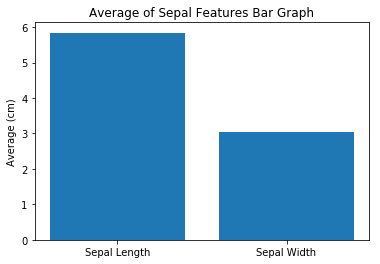

In [9]:
#Bar graph
fig8 = plt.figure()
plt.title('Average of Sepal Features Bar Graph')
bar1 = (X['Sepal Length']).mean()
bar2 = (X['Sepal Width']).mean()
plt.bar([0,1],[bar1,bar2],align='center')
plt.xticks([0,1],['Sepal Length','Sepal Width'])
plt.ylabel('Average (cm)')
plt.savefig('bargraph.png',bbox_inches='tight')
plt.show()

The second type is **histogram**, which is similar to the bar graph, but is representing a **continuous** variable on its x-axis rather than discrete units like bar graph. Because it is continuous, we need to specify how many bars we need in total, and in order to do so, we need to set the width of each bar, called **bin size**.

While histograms are popular, **density plots** are also favored for several reasons  
1. Histogram shape varies wildly depending on the bin size  
2. Density plots smooth out outliers and local fluctuations

The second point can be a weakness however, since local fluctuations can be very important. Let's look at an example

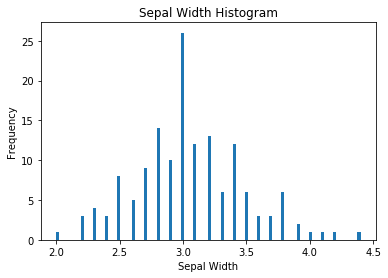

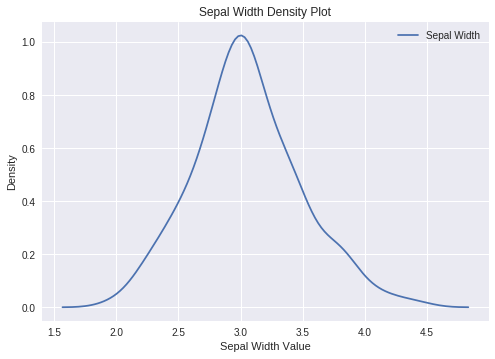

In [5]:
#Histogram
fig3 = plt.figure()
plt.subplot()

plt.hist(X['Sepal Width'],bins=100)
plt.title('Sepal Width Histogram')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

# Seaborn is a Statistical Visualization Package Based
# upon Matplotlib.
import seaborn as sns

#Density plot
plt.subplot()

density = sns.kdeplot(X['Sepal Width'])

plt.title ('Sepal Width Density Plot')
plt.xlabel('Sepal Width Value')
plt.ylabel('Density')
plt.show()


The smoothing parameter for the density plot can be adjusted by changing something called the smoothing bandwidth in order to adjust for sensitivity to fluctuations.

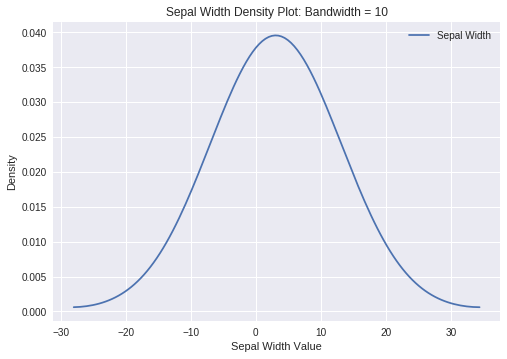

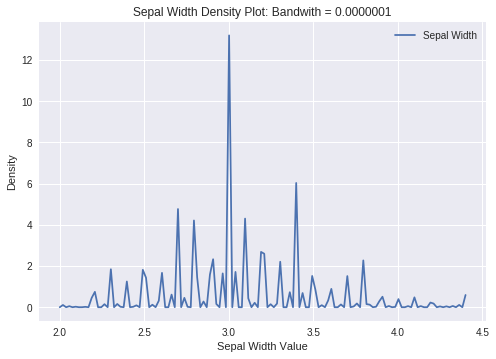

In [6]:
fig4 = plt.figure()

plt.subplot()

# A plot with REALLY high bandwith
sns.kdeplot(X['Sepal Width'], bw=10)

plt.title ('Sepal Width Density Plot: Bandwidth = 10')
plt.xlabel('Sepal Width Value')
plt.ylabel('Density')

plt.show()

plt.subplot()

# A plot with REALLY low bandwidth
sns.kdeplot(X['Sepal Width'], bw=0.0000001)

plt.title ('Sepal Width Density Plot: Bandwith = 0.0000001')
plt.xlabel('Sepal Width Value')
plt.ylabel('Density')

plt.show()

As you can see, the bandwidth value can have a drastic effect on the resulting graph. These are extreme examples, however; appropriate values for bandwidth differ case by case.

## More Visualization Techniques: Heatmap, Contour Map, Box Plot, and Violin Plot
Another plot for visualizing density is a **heat map**. Heat maps are a bivariate distribution which assigns colors to different regions depending on the density (or frequency or magnitude, depending on which feature you are trying to visualize) of values in that region.

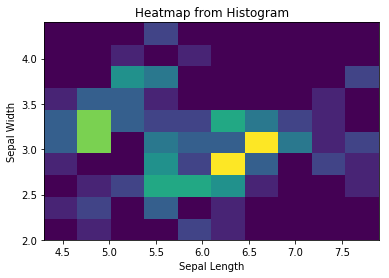

In [18]:
#Gaussian heatmap 2
fig5 = plt.figure()
Z, hmx, hmy = np.histogram2d(X['Sepal Length'],X['Sepal Width'])
plt.title('Heatmap from Histogram')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.pcolormesh(hmx,hmy,Z.T)
plt.savefig('gaussian_heatmap.png',bbox_inches='tight')
plt.show()

**Contours** are lines drawn in the map to show the areas with equal altitude from the ground level. Contour maps are, thus, the data visualization technique in which we draw multiple contours that connect the data points at the same height (in terms of frequency or magnitude) and to examine which data points or clusters are the **global maxima** and **global minima**, as well as the overall trend of the *distribution* and *elevation* of the given dataset.

It is important to notice that the heatmap and contour mapping is analogous to histograms vs density plots. As such, we must be wary of the advantages and disadvantages of both types of plots.

Contour plots are useful when deciding which parameters to use (defining the number of clusters) for clustering algorithms or Gaussian Naive Bayes.

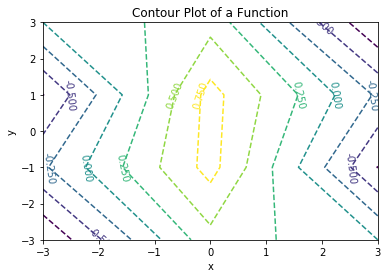

In [10]:
#Contour plot
fig7 = plt.figure()
xlist = np.linspace(-3.0, 3.0, 3)
ylist = np.linspace(-3.0, 3.0, 4)
x, y = np.meshgrid(xlist, ylist)
z = np.sin(x**2 +2*x*y+ y**2)
contour = plt.contour (x,y,z,linestyles='dashed')
plt.title('Contour Plot of a Function')
plt.xlabel('x')
plt.ylabel('y')
plt.clabel(contour, inline=False)
plt.savefig('contourplot.png',bbox_inches='tight')
plt.show()

The next two visualizations are **box plot** and **violin plot**. Both shows the max, min, and the median values of one feature from a given dataset. The only big difference is that while box plot has a box (which represents **IQR: Inter Quartile Range**, a range between 25% percentile and 75% percentile of the values) and two whiskers to represent maximum and minimum, violin plot has a three lines that indicates max (100% percentile), median (50% percentile), and min (0% percentile) and also has a probability density distribution of the data at different values along the line.

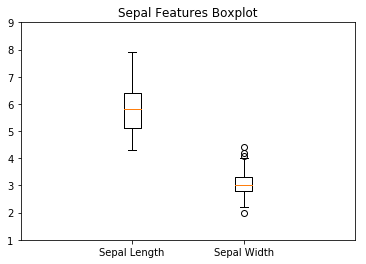

In [17]:
#Box plot
fig6 = plt.figure()
bp = plt.boxplot([X['Sepal Length'],X['Sepal Width']])
plt.title('Sepal Features Boxplot')
plt.xticks([1,2],['Sepal Length','Sepal Width'])
plt.xlim([0,3])
plt.ylim([1,9])
plt.savefig('boxplot.png',bbox_inches='tight')
plt.show()

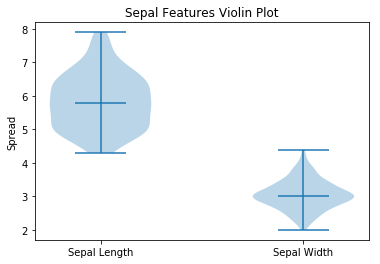

In [12]:
#Violin plot
fig9 = plt.figure()
plt.violinplot([X['Sepal Length'],X['Sepal Width']],showextrema=True,showmedians=True)
plt.title('Sepal Features Violin Plot')
plt.xticks([1,2],['Sepal Length','Sepal Width'])
plt.ylabel('Spread')
plt.savefig('violinplot.png',bbox_inches='tight')
plt.show()



We are also introducing **error bars**, which were designed to overcome one of main challenges of data visualization: to represent the uncertainty of the data. Error bars add a whisker to a data point, which indicates a possible ranges of values that the data point can potentially take, rather than designating one definite value.

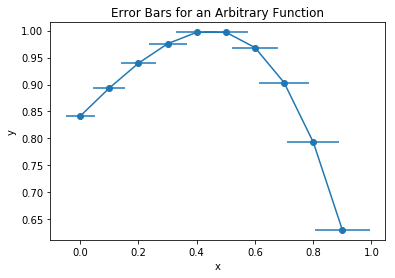

In [13]:
#Error bars
fig10 = plt.figure()
x = np.arange(0,1,0.1)
y = np.sin(np.exp(x))
error = 0.05 + 0.05*x
plt.errorbar(x,y,xerr=error,fmt='-o')
plt.title('Error Bars for an Arbitrary Function')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('errorbars.png',bbox_inches='tight')
plt.show()

## Advanced Visualization Techniques: maps

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm
 
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

## Using Maps to Visualize  
It is often worthwhile to put these data points on a map. A map provides several advantages which include:  
1. Provide context to certain patterns or clusters present within the data
2. Provide information that can explain outliers
3. Facilitate explanations to trends that have a real life counterpart.  

Maps can be generated using Basemap, a toolkit extension for matplotlib

/home/cai29/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


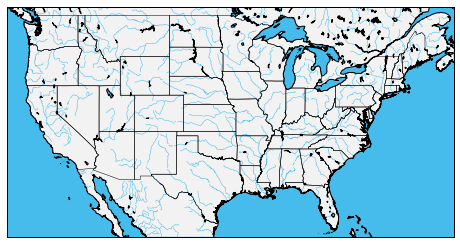

In [14]:
plt.figure()

plt.subplot()

# The coordinates for the bounding box of the map
westlimit=-127.09; southlimit=24.17; eastlimit=-63.72; northlimit=49.81

# Define the map object
america = Basemap(resolution='i',
                projection='merc',
                llcrnrlon=westlimit,llcrnrlat=southlimit,
                urcrnrlon=eastlimit,urcrnrlat=northlimit)

# Draw the lines on the map
america.drawmapboundary(fill_color='#46bcec')
america.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
america.drawrivers(color='#46bcec')
america.drawcoastlines()

america.readshapefile('./resources/states/cb_2016_us_state_500k', 'states')

plt.show()

This map of the US is pretty baren...what can we do to fill it?

Well, lets try to plot some points.

/home/cai29/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/cai29/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/cai29/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


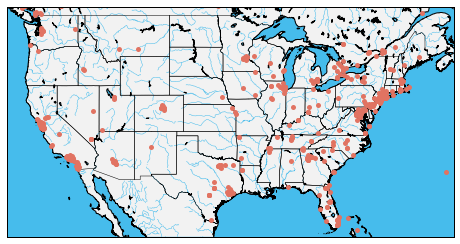

In [15]:
plt.figure()

plt.subplot()

# The coordinates for the bounding box of the map
westlimit=-127.09; southlimit=24.17; eastlimit=-63.72; northlimit=49.81

# Define the map object
america = Basemap(resolution='i',
                projection='merc',
                llcrnrlon=westlimit,llcrnrlat=southlimit,
                urcrnrlon=eastlimit,urcrnrlat=northlimit)

# Draw the lines on the map
america.drawmapboundary(fill_color='#46bcec')
america.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
america.drawrivers(color='#46bcec')
america.drawcoastlines()

america.readshapefile('./resources/states/cb_2016_us_state_500k', 'states')

# Some Random Sales data with geo-coordinates
records = pd.read_csv('./resources/SalesJan2009.csv')

# For each pair of latitude and longitude, get their map projection
# and plot that projection onto the map.
for lat, long in records[['Latitude','Longitude']].as_matrix():
    x, y = america(long, lat)
    america.plot(x,y, 'o', markersize=5, color='#e17362')


plt.show()

The above map plotting provides context to the plot, and provides information on
1. Why there are gaps between certain data points ( rivers )
2. Why certain clusters are formed where they are ( near waterfronts and major roads )

## Interactive Plots

Let's use plotly package to create interactive plots. Interactivity matters because it allows further analysis and isolation of certain parts of the data.

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go

In [18]:
myIris = pd.concat([X,Y], axis=1)

x0 = myIris[myIris[0] == 0]['Sepal Width']
x1 = myIris[myIris[0] == 1]['Sepal Width']
x2 = myIris[myIris[0] == 2]['Sepal Width']
trace0 = go.Histogram(x=x0)
trace1 = go.Histogram(x=x1)
trace2 = go.Histogram(x=x2)

data = [trace0,trace1,trace2]

layout = go.Layout(barmode='stack')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Animation
There are additional visual tools that you can use, that for the scope of this course we will only mention.
Please refer to these links:  
https://matplotlib.org/api/animation_api.html

https://matplotlib.org/2.0.0/mpl_toolkits/index.html

## Terms to review

1. Data Visualization
2. Histogram
3. Density plot
4. plotly
5. animation

## Further reading

* Plotly's website: https://plot.ly/

## Sources

[1] Hastie, Trevor, et al. _Elements of Statisical Learning_.